<a href="https://colab.research.google.com/github/mkorlyakova/MSTU-courses/blob/2024/ML%20magister/4/ML_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 2

## Линейные модели

**цель работы:**
  
  - отработка этапа подготовки данных для линейных моделей
  - отработка настройки алгоритмов генерации линейных границ между классами

## Модель работы от данных

Генерация любых моделей связаных с массивной обработкой данных для целей приложения методов машинного обучения к практическим задачам, как правило, осуществляется в рамках CRISP-DM (от английского Cross-Industry Standard Process for Data Mining). CRISP-DM — межотраслевой стандартный процесс исследования данных. Это проверенная в промышленности и наиболее распространённая методология, первая версия которой была представлена в Брюсселе в марте 1999 года, а пошаговая инструкция опубликована в 2000 году [https://ru.wikipedia.org/wiki/CRISP-DM].

CRISP-DM описывает жизненный цикл исследования данных, состоящий из 6 фаз, от постановки задачи с точки зрения бизнеса до внедрения технического решения.

Последовательность между фазами определена не строго, переходы могут повторяться от итерации к итерации. Все фазы CRISP-DM делятся на задачи, по итогам каждой должен быть достигнут конкретный результат.

Рассмотрим подробнее фазы жизненного цикла исследования данных по CRISP-DM:

**Понимание бизнеса (Business Understanding)** – определение целей проекта и требований со стороны бизнеса. Затем эти знания конвертируются в постановку задачи интеллектуального анализа данных и предварительный план достижения целей проекта. Задачи фазы Business Understanding:

  - Определить бизнес-цели
  - Оценить ситуацию
  - Определить цели анализа данных
  - Составить план проекта


**Начальное изучение данных (Data Understanding)** – сбор данных и знакомство с информацией, выявление проблем с качеством данных (ошибки или пропуски). Необходимо понять, какие сведения имеются, попробовать отыскать интересные наборы данных или сформировать гипотезы о наличии в них скрытых закономерностей. Задачи фазы Data Understanding:
  - Собрать исходные данные
  - Описать данные
  - Исследовать данные
  - Проверить качество данных


**Подготовка данных (Data Preparation)** – получение итогового набора данных, которые будут использоваться при моделировании, из исходных разнородных и разноформатных данных. Задачи фазы Data Preparation могут выполняться много раз без какого-то заранее определенного порядка:

  - Отобрать данные (таблицы, записи и атрибуты)
  - Очистить данные, в т.ч. выполнить их конвертацию и подготовку к моделированию
  - Сделать производные данные
  - Объединить данные
  - Привести данные в нужный формат


**Моделирование (Modeling)** – в этой фазе к данным применяются разнообразные методики моделирования, строятся модели и их параметры настраиваются на оптимальные значения. Обычно для решения любой задачи анализа данных существует несколько различных подходов. Некоторые подходы накладывают особые требования на представление данных. Таким образом часто бывает нужен возврат на шаг назад к фазе подготовки данных. Задачи фазы Modeling:

  - Выбрать методику моделирования
  - Сделать тесты для модели
  - Построить модель
  - Оценить модель


**Оценка (Evaluation)** – анализ количественных характеристик качества модели, подтверждение или опровержение того, что, благодаря построенной модели все бизнес-цели достигнуты. Основной целью этапа является поиск важных бизнес-задач, которым не было уделено должного внимания. Задачи фазы Evaluation:

  - Оценить результаты
  - Сделать ревью процесса
  - Определить следующие шаги


**Внедрение (Deployment)** – в зависимости от требований фаза развертывания может быть простой (составление финального отчета) или сложной, например, автоматизация процесса анализа данных для решения бизнес-задач. Обычно развертывание — это внедрение полученных моделей в прикладную сферу. Задачи фазы Deployment:

  - Запланировать развертывание
  - Запланировать поддержку и мониторинг развернутого решения
  - Сделать финальный отчет
  - Сделать ревью проекта


Оценка и исследование данных основной этап при подготовке любых моделей (и занимает основную часть времени 70-80% общих затрат внремени происходит на этом этапе). перечислим основные этапы :

  -


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

## Логистическая регрессия

_Логистическая регрессия_ - частный случай линейного классификатора, обладающий одной полезной особенностью - помимо отнесения объекта к определенному классу она умеет прогнозировать вероятность $P$ того, что объект относится к этому классу.


Пусть в каждой точке пространства объектов $\mathbb{X}$ задана вероятность того, что объект $x$ будет принадлежать к классу "+1" $P(y=1|x)$ (условная вероятность $y = 1$ при условии $x$). Она будет принимать значения от 0 до 1, и нам нужно каким-то образом ее предсказывать, но пока мы умеем только строить прогноз методами линейной регрессии с помощью некоего алгоритма $b(x)=\left \langle w,x_{i} \right \rangle$. У него есть проблема, связанная с тем, что скалярное произведение $\left \langle w,x_{i} \right \rangle$ не всегда возвращает значения в отрезке [0, 1]. Чтобы достичь такого условия, можно использовать некую функцию $\sigma:\mathbb{R} \rightarrow [0,1]$, которая будет переводить полученное в скалярном произведении значение в вероятность, пределы которой будут лежать в промежутке от 0 до 1.

### Рабочая часть модели

В модели логистической регрессии в качестве такой функции берется сигмоида, которая имеет вид:

$$z(x_{i})=\left \langle w,x_{i} \right \rangle$$

$$\sigma(z) = \frac{1}{1 + exp(-z)}.$$


### Потери

В случае, когда $y$ принимает значения 0 и 1, log loss запишется как

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}\frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)} + (1 - y_{i})\text{ln} \frac{exp(-\left \langle w,x_{i} \right \rangle)}{1 + exp(-\left \langle w,x_{i} \right \rangle)}).$$



$$-\text{ln}L(X) = -\sum^{l}_{i=1} ( y_{i} \text{ln}\ sigma(z_{i}) + (1 - y_{i})\text{ln} ( 1  -  sigma(z_{i}))).$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
import warnings

warnings.filterwarnings( "ignore")

Реализация логистической регрессии :

In [ ]:
#
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#
def log_loss(w, X, y):
    m = X.shape[1]


    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(w.T, X))

    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    loss = np.squeeze(loss)
    grad = 1.0 / m * np.dot(X, (A - y).T)

    return loss, grad

#
def optimize(w, X, y, n_iterations, eta):
#     потери будем записывать в список для отображения в виде графика
    losses = []
    X = X.T
    X = np.vstack((np.ones((1,X.shape[1])),X))

    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)

    return w, losses
#
def predict(w, X):
    X = X.T
    m = X.shape[1]
    X = np.vstack((np.ones((1,X.shape[1])),X))
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X))

#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5):
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0

    return y_predicted

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

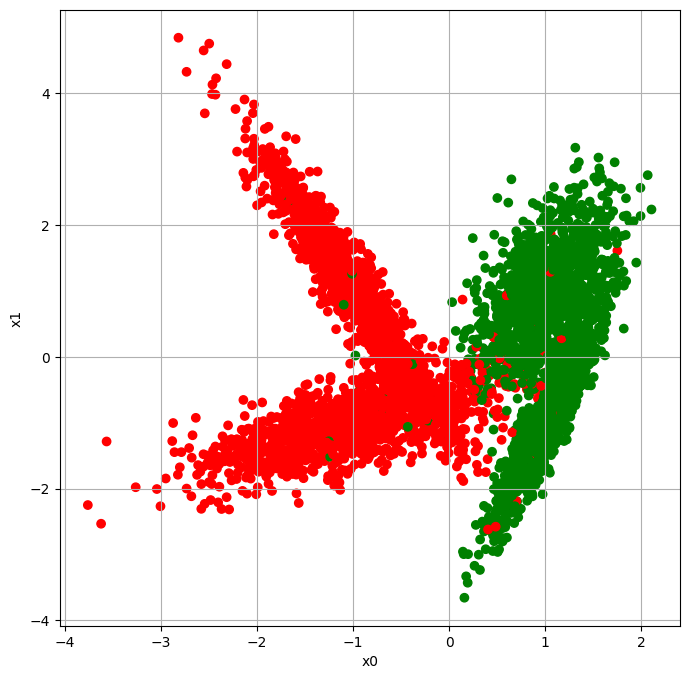

In [ ]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples=5000, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=110)
#

#classes = datasets.make_blobs(n_samples=1000,centers = 2, cluster_std = 1., random_state=12)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue','green'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()


In [ ]:
# разбиение данных на тренировочные и отложенную выборку (тестовые),
#где X, y - описание примеров и их целевое свойство (классы), а test_size=0.2 - пропорция разбиения (доля тестов)
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(classes[0], classes[1], test_size=0.2, random_state=1)

# иницилизируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[1]+1, 1))+0.1
n_iterations = 500
eta = 0.05

w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

y_predicted_test = predict(w, X_test_tr)
y_predicted_train = predict(w, X_train_tr)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[-0.25265114]
 [ 2.85147318]
 [ 0.09719725]]
Точность на обучающей выборке: 96.750
Точность на тестовой выборке: 97.800


### **Задание 1.**

1.1 Измените модель логистической регрессии из кода выше на модель с условием выхода по числу итераций (это есть ) и разнице параметров w для двух последовательных шагов.

1.2 Измените модель для сохранения на каждом шаге изменения параметров w ошибки модели в тестовом наборе данных (на отложенной выборке)

1.3 Добавьте собственную реализацию вычисления Accuracy

1.4 Оцените (постройте кривые изменения Accuracy и потерь для тестовой(отложенной выборки) ) поведение модели при использовании одного критерия останова и 2-х (исходная схема модели и модель по п.1.1)

1.5  зафиксируйте результаты в таблице и сделайте выводы

### **Задание 2.**

2.1  Проведите эксперимент(для кода из результата задания 1) с изменением шага обучения eta в диапазоне (0.1, 2) с дискретностью 0.1

2.2  зафиксируйте результаты в таблице и сделайте выводы


## Sklearn LogisticRegression

Классификатор логистической регрессии (также известный как логит, MaxEnt) https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

  - Класс реализует логистическую регрессию с использованием библиотеки «liblinear», решателей «newton-cg», «sag», «saga» и «lbfgs».

  - Регуляризация применяется по умолчанию (не для всех решателей одинаковая).

  - В случае с несколькими классами алгоритм обучения использует схему «один против остальных» (OvR)


  - penalty {'l1', 'l2', 'elasticnet', 'none'}, по умолчанию = 'l2':

      - 'none': пенальти не добавляется;

      - 'l2': штраф L2 (по умолчанию);

      - 'l1': штраф L1;

      -  'elasticnet': штраф L1 и L2.

  - tol: критерий останова по изменению параметров модели default=1e-4

  - class_weight - dict или ‘balanced’, default=None. Веса, классов для случая разбалансированных данных (большему классу ставим меньший вес) . Если не указано, предполагается, что все классы имеют вес один.{class_label: weight}
. Режим ‘balanced’использует значения y для автоматической корректировки весов обратно пропорционально частотам классов во входных данных как .n_samples / (n_classes * np.bincount(y))

  - solver : решатель {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, по умолчанию = 'lbfgs'. Алгоритм для использования в задаче оптимизации. Значение по умолчанию — 'lbfgs'. Для небольших наборов данных хорошим выбором является «liblinear», «sag» и «saga» работают быстрее для больших.Для многоклассовых задач только «newton-cg», «sag», «saga» и «lbfgs». Выбор алгоритма и штрафа связаны. Поддерживаемые решателем штрафы:

      - ‘newton-cg’ - [‘l2’, ‘none’]
      - ‘lbfgs’ - [‘l2’, ‘none’]
      - ‘liblinear’ - [‘l1’, ‘l2’]
      - ‘sag’ - [‘l2’, ‘none’]
      - ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]


  - max_iter : критерий останова по числу итераций, по умолчанию = 100
Максимальное количество итераций, необходимых для сходимости решателей.

  - multi_class {‘auto’, ‘ovr’, ‘multinomial’}, по умолчанию = ‘auto’. Если выбрана опция 'ovr', то для каждой метки решается бинарная задача. Для ‘multinomial’ минимизация потерь — это ‘multinomial’ потери, подходящие для всего распределения вероятностей, даже если данные являются двоичными .
  - n_jobs : Количество ядер ЦП, используемых при распараллеливании по классам, если multi_class='ovr'». None означает 1,  -1 означает использование всех процессоров.

  - l1_ratio параметр регуляризации Elastic-Net для комбинирования L1 и L2.




In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

## SKlearn метрики

Модуль sklearn.metrics предоставляет набор простых функций, измеряющих ошибку предсказания с учетом истинности и предсказания:

  - функции, заканчивающиеся на, _score возвращают значение для максимизации, чем выше, тем лучше.
  - функции, заканчивающиеся на _error или _loss возвращающие значение, которое нужно минимизировать, чем ниже, тем лучше.
  

Некоторые из них ограничены случаем двоичной классификации:

  - precision_recall_curve(y_true, probas_pred, *)	Вычислите пары точности-полноты для разных пороговых значений вероятности.
  - roc_curve(y_true, y_score, *[, pos_label, …])	Вычислить рабочую характеристику приемника (ROC).

Другие работают в случае мультикласса:

  - balanced_accuracy_score(y_true, y_pred, *[, …])	Вычислите сбалансированную точность.
  - confusion_matrix(y_true, y_pred, *[, …])	Вычислите матрицу неточностей, чтобы оценить точность классификации.
  - roc_auc_score(y_true, y_score, *[, average, …])	Вычислить площадь под кривой рабочих характеристик приемника (ROC AUC) по оценкам прогнозов.

Работают универсально:

  - accuracy_score(y_true, y_pred, *[, …])	Классификационная оценка accuracy.
  - classification_report(y_true, y_pred, *[, …])	Создайте текстовый отчет, показывающий основные показатели классификации.
  - f1_score(y_true, y_pred, *[, labels, …])	Вычислите оценку F1, также известную как сбалансированная оценка F или F-мера.
  - fbeta_score(y_true, y_pred, *, beta[, …])	Вычислите оценку F-beta.

  - log_loss(y_true, y_pred, *[, eps, …]) кросс-энтропия или логистические потери.

  - multilabel_confusion_matrix(y_true, y_pred, *)	Вычислите матрицу неточностей для каждого класса или образца.
  - precision_recall_fscore_support(y_true, …)	Точность , полнота, F-мера и поддержка для каждого класса.
  - precision_score(y_true, y_pred, *[, labels, …])	Вычислите точность.
  - recall_score(y_true, y_pred, *[, labels, …])	Вычислите отзыв.
  - roc_auc_score(y_true, y_score, *[, average, …])	Вычислить площадь под кривой рабочих характеристик приемника (ROC AUC) по оценкам прогнозов.

### **Пример:**

  - для синтетического набора строим логистическую регрессию и оцениваем ее по метрике accuracy

In [ ]:

from sklearn.linear_model import LogisticRegression
# создадим модель
logistic_regressor = LogisticRegression(penalty='l2', tol = 0.001, max_iter=10, multi_class='auto', solver='saga' )

# обучим ее
logistic_regressor.fit(X_train_tr, y_train_tr)

# выведем полученный вес при признаке и свободный коэффициент
print(logistic_regressor.coef_[0], logistic_regressor.intercept_)

[5.3043861  0.08215116] [-1.24805523]


  - на тестовом наборе получим предсказание в форме класса (.predict()) и в вероятностной оценки каждого класса (.predict_proba())

In [ ]:
y_pred = logistic_regressor.predict(X_test_tr)  # жесткий ответ (метка класса)
y_pred_proba = logistic_regressor.predict_proba(X_test_tr) # вероятностная оценка класса

  - визуализируем результаты и определим значение метрики

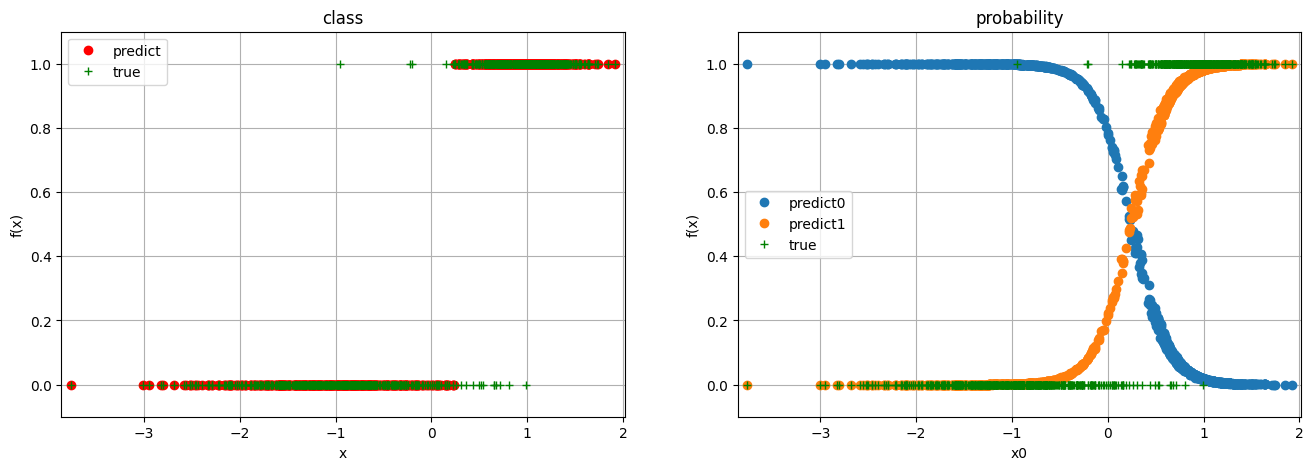

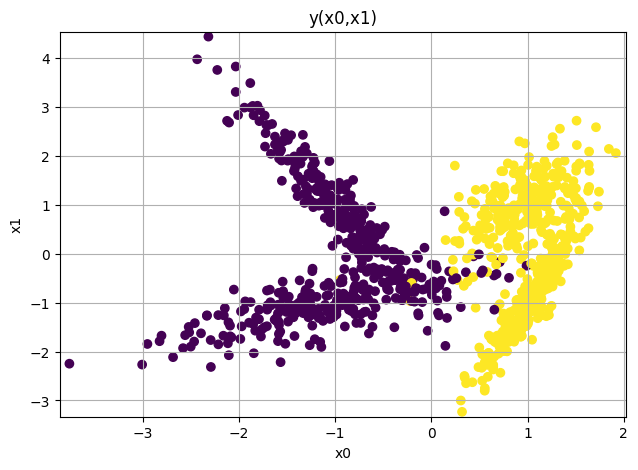

accuracy:  0.981


In [ ]:


n = 0 # номер признака для визуализации. проверить результат для n = 1
plt.figure(figsize = (16,5))

ymin = y_test_tr.min()-0.1
ymax = y_test_tr.max()+0.1
xmin = X_test_tr[:,n].min()-0.1
xmax = X_test_tr[:,n].max()+0.1

plt.subplot(1,2,1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(ymin,ymax)
plt.xlim(xmin,xmax)
plt.plot(X_test_tr[:,n], y_pred,'or', label = 'predict')
plt.plot(X_test_tr[:,n], y_test_tr, '+g', label = 'true')
plt.grid()
plt.legend()
plt.title('class')

plt.subplot(1,2,2)

plt.ylim(ymin,ymax)
plt.xlim(xmin,xmax)
plt.title('probability')

for m in range(y_pred_proba.shape[1]):
  if m>1:
    mk = m
  else : mk = 1
  plt.plot(X_test_tr[:,n], y_pred_proba[:,m]*mk,'o', label = 'predict'+ str(m) )

plt.plot(X_test_tr[:,n], y_test_tr, '+g', label = 'true')
plt.grid()
plt.legend()
plt.xlabel('x0')
plt.ylabel('f(x)')



plt.show()


plt.figure(figsize = (7.3,5))
n2 = 1
xmin0 = X_test_tr[:,n2].min()-0.1
xmax0 = X_test_tr[:,n2].max()+0.1

plt.xlabel('x0')
plt.ylabel('x1')
plt.ylim(xmin0,xmax0)
plt.xlim(xmin,xmax)
plt.scatter(X_test_tr[:,n],X_test_tr[:,n2], c = y_test_tr)
plt.title('y(x0,x1)')

plt.grid()

plt.show()


print('accuracy: ',accuracy_score(y_test_tr,y_pred))

На графиках видно, что классификация проходит не очень надежно по признаку х1 и очень хорошо по признаку х0 (практически разделяющий по значению х0 == 0, все для х0<0 соответствует метке 0, все для х0>0 м= метка 1)





  - сформируем отчет о классификации

In [ ]:
print(classification_report(y_test_tr, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       488
           1       0.97      0.99      0.98       512

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



  - проведем эксперимент для нескольких перезапусков алгоритма (К) и различных сочетаний значений гиперпараметров (tol, max_iter). Сделаем сеточный поиск в пространстве вариантов для множества К = 10 реализаций

In [ ]:
import seaborn as sns

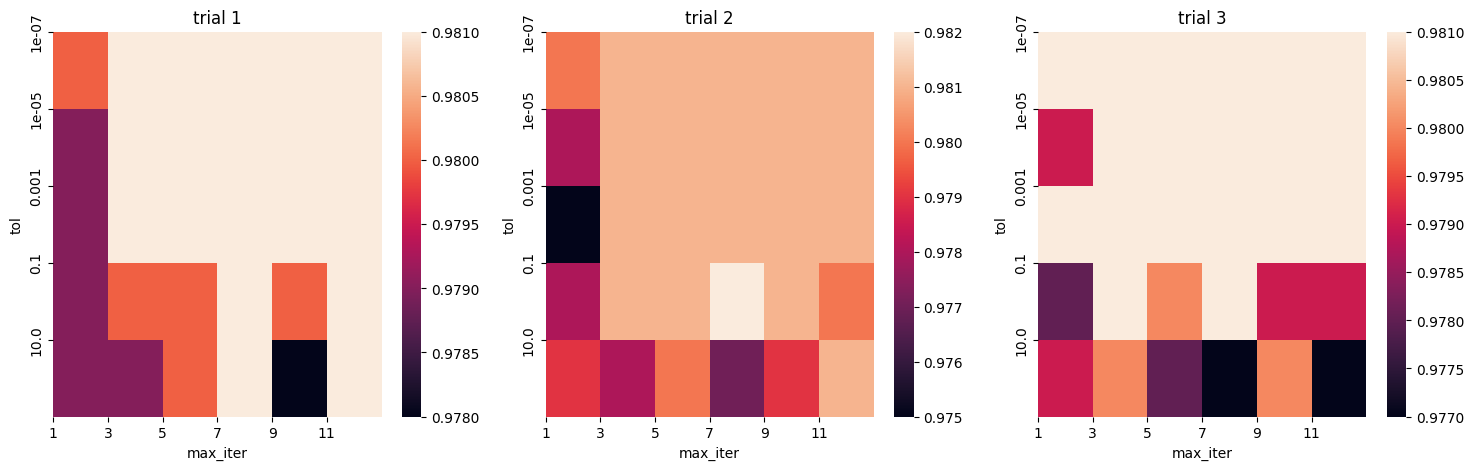

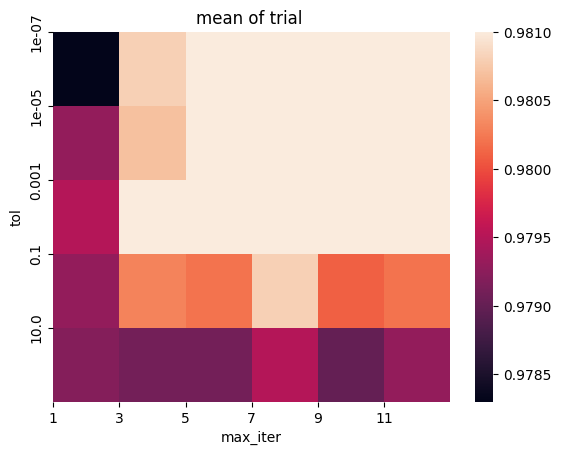

In [ ]:
# Эксперимент
rez = []
K = 10
for tol in np.logspace(-7,1,5):
  for max_iter in range(1,12,2):
    acc = []
    for k in range(K):
      logistic_regressor = LogisticRegression( tol = tol, max_iter=max_iter, solver = 'saga')
      # обучим ее
      logistic_regressor.fit(X_train_tr, y_train_tr)
      y_pred = logistic_regressor.predict(X_test_tr)
      acc += [accuracy_score(y_test_tr,y_pred)]
    rez += [[tol,max_iter]+ acc]

rez = np.array(rez)

# Визуализация результата в форме тепловой диаграммы для отдельных реализаций
plt.figure(figsize = (18,5))
for i in [1,2,3]:
  plt.subplot(1,3,i)
  acc_all = rez[:,-i].reshape(5,6)
  sns.heatmap(acc_all)
  plt.title('trial '+str(i))
  plt.xlabel('max_iter')
  plt.xticks(list(range(6)),[str(x) for x in range(1,12,2)])
  plt.ylabel('tol')
  plt.yticks(list(range(5)),[str(x) for x in np.logspace(-7,1,5)])
plt.show()

# Визуализация результата в форме тепловой диаграммы для среднего по всем реализациям (можно еще и разбросс смотреть)

acc_mean = rez[:,-K:].mean(axis=1).reshape(5,6)
sns.heatmap(acc_mean)
plt.title('mean of trial ')
plt.xlabel('max_iter')
plt.xticks(list(range(6)),[str(x) for x in range(1,12,2)])
plt.ylabel('tol')
plt.yticks(list(range(5)),[str(x) for x in np.logspace(-7,1,5)])
plt.show()


  - вывод: необходимо более 5 итераций и менее 0.1 tol. Выборка примеров сбалансирована, и применение метрик типа accuracy обосновано

### **Задание 3.**

Построить последовательность обработки примеров для набора "Ирисы Фишера"(load_iris):
 - провести генерацию классификатора (обратить внимание на параметр multi_class)
 - провести анализ результата (см. пример)

In [ ]:
data = load_iris()
X, y = data.data, data.target
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(X, y, test_size=0.2, random_state=1)

### **Задание 4.**

Самостоятельно оценить данные по варианту (можно использовать часть выборки , если не хватает ресурсов системы для обработки):

In [ ]:
V1 = datasets.load_wine()
V2 = datasets.load_digits()
V3 = datasets.load_breast_cancer()
V4 = datasets.make_classification(n_samples = 10000, n_features=5, n_redundant=2, n_informative=2,random_state=10, n_clusters_per_class=2)
V5 = datasets.fetch_covtype(return_X_y=True)
V6 = datasets.make_blobs(n_samples=10000, centers=2, n_features=5, random_state=10)
V7 = datasets.make_circles(n_samples=10000, factor=0.5, noise=0.05)
V8 = datasets.make_moons(n_samples=10000, noise=0.05)

In [ ]:
V1.keys(), V2.keys(), V3.keys()

(dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']),
 dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']),
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']))

In [ ]:
V1.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
V2.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
V3.target[-5:]

array([0, 0, 0, 0, 1])

In [ ]:
V4[1]

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
V5[1]

array([5, 5, 2, ..., 3, 3, 3], dtype=int32)

In [ ]:
V6[1]

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
V7[1]

array([1, 1, 0, ..., 0, 0, 1])

 4.1.Загрузить данные  по варианту

 4.2.Построить линейный классификатор в формате sklearn (LogisticRegression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) и в коде из Задания 1. (обратить внимание на значения целевого признака и связанное с ним количество классов)

 4.3. Выбрать метрику (учитываем балансировку данных и смысл задачи) и оценить качество модели на отложенной выборке

 4.4. сделать выводы о качестве для модели из задания 1 и sklearn на основе выбранной метрики

 4.5. Привести все признаки к одному диапазону (0,1) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) или провести стандартизацию признаков (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) , построить модель в sklearn и оценить метрики на отложеной выборке

 4.6. Построить классификатор с изменением основных гиперпараметров (по sklearn) : эксперимент по каждому направлению отдельно : penalty  {'l2', 'l1'}, tol = [0.0001, 0.001, 0.01, 0.1], max_iter=[1,2,5,10, 20,50,100,500]. Зафиксировать в каждом эксперименте(при изменении одного из параметров) accuracy, f1,точность, полнота, РR_auc,  ROC_auc в таблице результатов.

 4.7 Повторить кадый эксперимент 5-10 раз для всех вариантов значений и построить зависимость метрики от каждого из гиперпараметров отдельно (или парами в виде тепловой диаграммы)

 4.8 Сделать выводы о качестве модели

## **Линейная регрессия**

Зависимость предсказываемой переменной от признаков будет линейной, если имеет следующий вид:

$$a(x) = w_{0}+\sum^{d}_{i=1}w_{i}x^{i}.$$

где веса $w_{i}$ и  $w_{0}$ - _свободным коэффициентом_ или _сдвигом_.

Оптимизация модели в таком случае заключается в подборе оптимальных значений весов.

Линейную модель можно описать как скалярное произведение вектора признаков $x=(x^{1},...,x^{d})$ на вектор весов $w=(w_{1},...,w_{d})$:

$$a(x) = w_{0}+\left \langle w,x \right \rangle.$$

или добавить еще один признак (константный), на каждом объекте равный единице, тогда получим

$$a(x) = \sum^{d+1}_{i=1}w_{i}x^{i}=\left \langle w,x \right \rangle.$$

За счет простой формы линейные модели достаточно легко обучются и позволяют работать с зашумленными данными, небольшими выборками, контролирауя при этом риск переобучения.

Для обучения модели можно взять в качестве функционала ошибки модуль отклонения $Q(a,y)=|a(x)-y|$. Соответствующий функционал ошибки называется средним абсолютным отклонением (mean absolute error, MAE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}|a(x_{i})-y_{i}|.$$

Однако, методы оптимизации включают в себя дифференцирование, а функция модуля не является гладкой - она не имеет производной в нуле.

Распространенный метод оценки потерь - квадрат разности $Q(a,y)=(a(x)-y)^{2}$. Такая функция является гладкой и имеет производную в каждой точке, а ее минимум достигается при равенстве истинного ответа $y$ и прогноза $a(x)$.

Основанный на этой функции функционал ошибки называется _среднеквадратичным отклонением_ (mean squared error, MSE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}(a(x_{i})-y_{i})^{2}.$$

### **МНК**
Продифференцировав данную функцию по вектору $w$ и приравняв к нулю, можно получить явную анатилическую формулу для решения задачи минимизации (можно смотреть тут https://ml-handbook.ru/chapters/linear_models/intro или тут https://habr.com/ru/company/ods/blog/323890/):

$$w = (X^{T}X)^{-1}X^{T}y.$$

Это решение называется _нормальным уравнением_ линейной регрессии.

Проблемы:
  - вычислительная сложность операции (обращение матрицы $X^{T}X$ будет иметь кубическую сложность от количества признаков $d^{3}$),
  - матрица $X^{T}X$ может быть вырожденной и поэтому необратимой

### **Градиентный спуск**

- От стартовой точки будем итерационно сдвигаться в сторону антиградиента с определенным _шагом_ $\eta_{k}$, на каждом шагу пересчитывая градиент в точке, в которой мы находимся.
- $k$-й шаг градиентного спуска будет иметь вид

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$

- для квадратичных потерь градиент принимает вид

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

- функция из sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score):
    - fit_intercept , по умолчанию = True (делать ли центрирование).
    - объект имеет атрибуты coef_ и intercept_ , которые соответствуют весам $w_{i}$ и  $w_{0}$
    - объект регрессия нужно создать : LinearRegression()
    - провести обучение : .fit(X,y)
    - использовать для предсказания : .predict(X)

.




### **Задание 5**

генерация решения для модели в форме линейной регрессии


In [ ]:
from sklearn.datasets import fetch_california_housing

import sklearn.datasets as datasets
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score # коэффициент детерминации

V = fetch_california_housing(return_X_y=True)

In [ ]:
x = V[0]
y = V[1]
x.shape, y.shape  # x - описание объектов, у - стоимость объектов



((20640, 8), (20640,))

Разделяем данные:

In [ ]:
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(x, y, test_size=0.2, random_state=1)

Обучаем модель:

In [ ]:
reg = LinearRegression() # Создали объект линейная регрессия
reg.fit(X_train_tr, y_train_tr) # обучили
reg.score(X_test_tr, y_test_tr) # Возвращает коэффициент детерминации прогноза


0.5965968374812278

In [ ]:
y_pred0 = reg.predict(X_test_tr) # сделали предсказание

или оцениваем значение коэффициента детерминации напрямую из y_pred

In [ ]:
r2_y_test_tr = r2_score(y_test_tr, y_pred0)
r2_y_test_tr

0.5965968374812278

Визуализируем результаты:

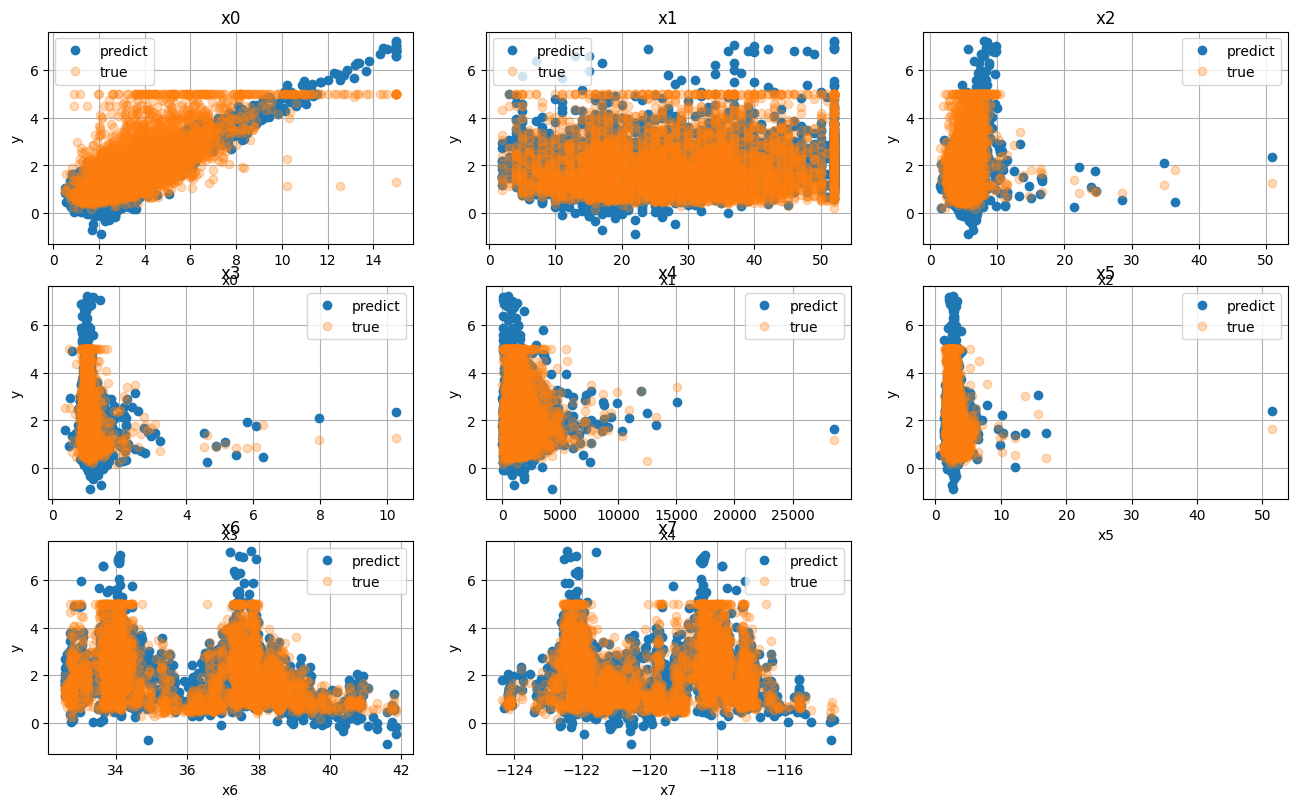

In [ ]:
plt.figure(figsize = (16,16))
for i in range(X_test_tr.shape[1]):
  plt.subplot(5,3,i+1)
  plt.plot(X_test_tr[:, i],y_pred0,'o', label = 'predict')
  plt.plot(X_test_tr[:, i],y_test_tr,'o', label = 'true', alpha = 0.3)
  plt.title('x'+str(i))
  plt.xlabel('x'+str(i))
  plt.ylabel('y')
  plt.grid()
  plt.legend()
plt.show()

Связь предсказания и истиных значений (тут сильная связь == хорошее предсказание)

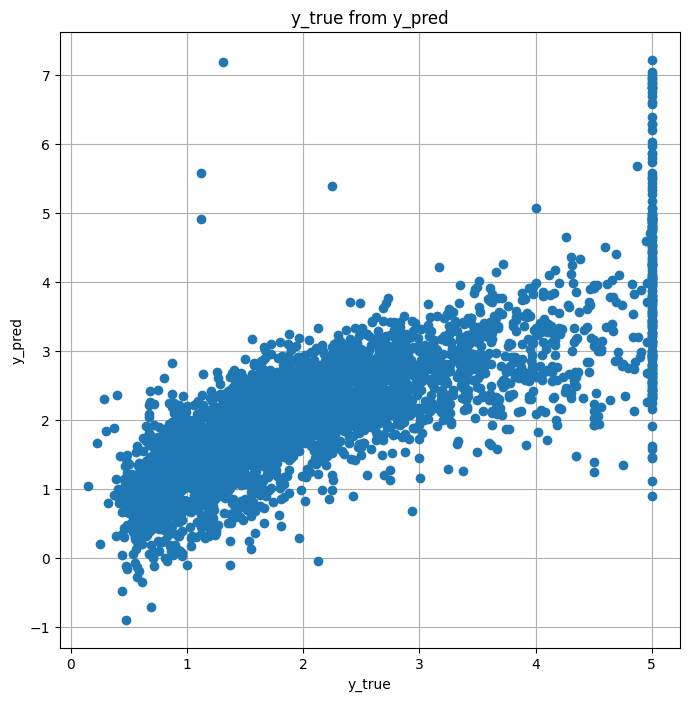

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(y_test_tr,y_pred0,'o', label = 'predict')
plt.title('y_true from y_pred')
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.grid()
plt.show()

In [ ]:
np.max(y), np.max(y_pred0)

(5.00001, 7.218140306347003)

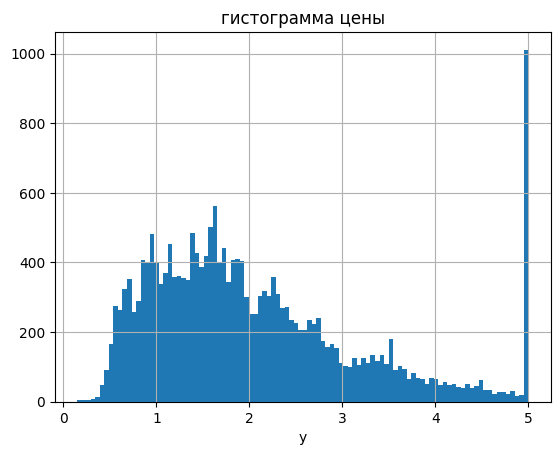

In [ ]:
plt.hist(y, bins = 100)
plt.grid()
plt.xlabel('y')
plt.title('гистограмма цены')
plt.show()


Данные содержат примеры для которых цена (у) имеет значение 5.00001 (очевидно, что это замены значения "более 5.00001"), что видно и на гистограмме. получить точное значение этой цены нет прямой возможности, но можно исключиь примеры со значением у = 5.00001 из рассмотрения в тренировочном наборе, а все результаты, которые будут превышать 5.00001 в тестовом переназначить на это значение

In [ ]:
ind_y = np.where(y_train_tr < 5.00001)[0]
reg = LinearRegression() # Создали объект линейная регрессия
reg.fit(X_train_tr[ind_y,:], y_train_tr[ind_y]) # обучили
r2_y_test_tr = reg.score(X_test_tr, y_test_tr) # Возвращает коэффициент детерминации прогноза
r2_y_test_tr

0.5964808669030421

качество ответа даже несколько ниже чем при использовании всех данных.

Добавляем обрезку значения предсказания и проверим коэф.детерминации:

In [ ]:
y_pred_t = np.where(y_pred > 5.00001, 5.00001, y_pred)
r2_y_test_tr_cut = r2_score(y_test_tr, y_pred_t)
r2_y_test_tr_cut

0.6145917577573334

Получаем +0.02 качества модели в рамках принятой оценки. Это можно оценить визуально

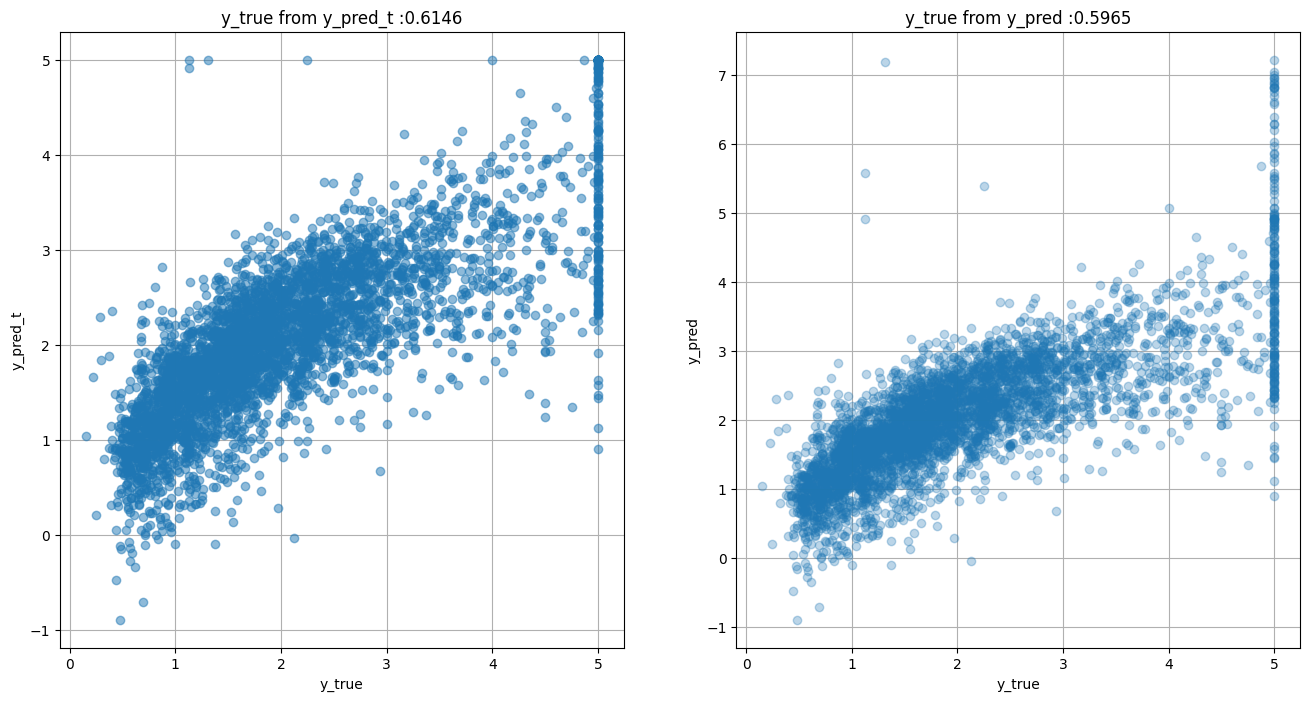

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.plot(y_test_tr,y_pred_t,'o', label = 'predict after cut', alpha = 0.5)

plt.title('y_true from y_pred_t :' + str(np.round(r2_y_test_tr_cut,4)))
plt.xlabel('y_true')
plt.ylabel('y_pred_t')
plt.grid()
plt.subplot(1,2,2)

plt.plot(y_test_tr,y_pred,'o', label = 'predict', alpha = 0.3)
plt.title('y_true from y_pred :' + str(np.round(r2_y_test_tr,4)))
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.grid()

plt.show()

Гистограмма предсказания имеет характер нормального закона распределения, а гистограмма целевого свойства (даже без значений 5.00001) нет, что тоже не соответствует идеологии линейных модлеей.

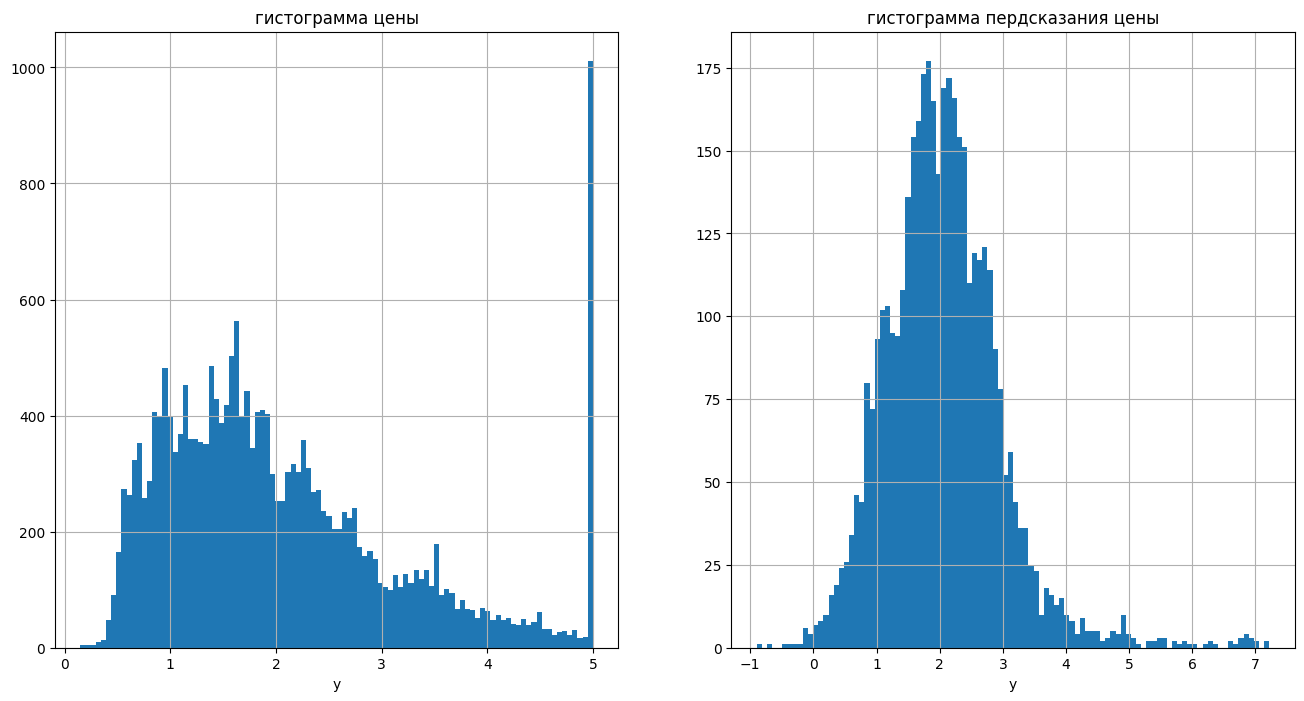

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.hist(y, bins = 100)
plt.grid()
plt.xlabel('y')
plt.title('гистограмма цены')
plt.subplot(1,2,2)
plt.hist(y_pred, bins = 100)
plt.grid()
plt.xlabel('y')
plt.title('гистограмма пердсказания цены')

plt.show()

Это подразумевает необходимость проводить обработку входных признаков и целевого признака с целью приблизить их к форме "удобной" для линейных моделей.   

5.1. Построить регрессию на всех признаках сразу (см. пример выше)

5.2. Построить регрессию от каждого признака отдельно

5.3. Сравнить коэффициент детерминации для регрессии по каждому признаку отдельно с коэффициентом детерминации модели на всех признаках

5.4. Выбрать опираясь на результаты генерации моделей по одному признаку 5 признаков, которые использовать для построения регрессии на этих признаках

5.5. Провести преобразование признаков и целевого свойства (Привести все признаки к одному диапазону (0,1) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) или провести стандартизацию признаков (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) , построить модель в sklearn и оценить метрики на отложеной выборке)

5.6. Сделать визуальную оценку результатов обучения моделей и определить лучшую по коэффициенту детерминации модель

5.7. Сделать выводы


Резюме Логистической регрессии:

  - Делает численные оценки вероятности его принадлежности каждому из классов.

  - Является частным случаем обобщённой линейной модели регрессии

  - Оценки вероятностей и рисков могут оказаться неадекватными, если не признаки зависимы
  - Практичная реализация должна предусматривать :
      - стандартизацию данных,
      - отсев выбросов,
      - регуляризацию,
      - отбор признаков.

### Дополнительные материалы:
[Обобщенные линейные модели](https://education.yandex.ru/handbook/ml/article/obobshyonnye-linejnye-modeli)
[бибилиотека , реализующая обобщенные линейные модели](https://www.statsmodels.org/stable/glm.html)

Вопросы для контроля:

  1. Метод стохастического градиента. Расписать градиентный шаг для квадратичной функции потерь и для линейной регрессии.
  2. Недостатки метода SG и как с ними бороться?
  3. Обоснование логистической регрессии и ее идея.
  4. Как выражается функция потерь в логистической регрессии .
  5. Что такое ROC-кривая, как она определяется?
  6. В каких алгоритмах классификации можно узнать не только классовую принадлежность классифицируемого объекта, но и вероятность того, что данный объект принадлежит каждому из классов?
  7. Что такое принцип максимума совместного правдоподобия данных и модели?